### PCA ASSIGNMENT-2

####  Part A: Exploratory Data Analysis (EDA) & Preprocessing

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


# Part A: Load and Prepare the Dataset and Initial Analysis 

In [2]:
#loading dataset
df = pd.read_csv("mushrooms.csv")

#seperating the class and rest of the set
X = df.drop("class", axis=1)
y=df["class"]

# printing data types
print(X.dtypes)

#encding all the columns as all columns are categorical 
Onehot = OneHotEncoder(sparse_output=False, drop=None)
X_encoded = Onehot.fit_transform(X)
colnames = Onehot.get_feature_names_out(X.columns)
X_encoded_df = pd.DataFrame(X_encoded, columns=colnames)

#Shape Before and after encoding
print("\n\nShape before encoding:", X.shape)
print("Shape after one_hot encoding:", X_encoded_df.shape)

cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object


Shape before encoding: (8124, 22)
Shape after one_hot encoding: (8124, 117)


* We perform one hot encoding on categorical variables because PCA cannot work with non-numerical variables, and for pca we end up calculating covariance matrix (Xt*X) while finding the component with highest variance and we cannot use non numerical terms for that, and and one hot enoder does this by representing non numerical ones into numerical binary ones and helps in calculation and also avoid any ordinal relationship as we have new colums representing frequence for each category in every variable making it 22 to 117 columns for all variables.

#### Standardization 

In [3]:
# Standardizing encoded variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded_df)
print(X_scaled[0]) # just 117 cols printing 4 visibility


print("\nprinting encoded column names for cap shape\n",colnames[0:10])

[-0.24272523 -0.02219484 -0.79620985 -0.33687808 -0.062885    1.10548662
 -0.63223756 -0.02219484  1.47594165 -0.81532454 -0.14531393 -0.07379393
 -0.47586687 -0.54111656  1.59903649 -0.1343321  -0.04442251 -0.04442251
 -0.38315756 -0.38988923 -1.18591657  1.18591657 -0.22756678 -0.15558197
 -0.60180814 -0.22756678 -0.0667161  -0.87614155  5.54385922 -0.27624555
 -0.27624555 -0.16289645  0.16289645  0.43886364 -0.43886364 -1.49468272
  1.49468272 -0.5197777  -0.10935331 -0.31938628 -0.31468393  4.34876588
 -0.38484578 -0.08910918 -0.47430986 -0.05443311 -0.25390039 -0.41671241
 -0.10343684  1.14480575 -1.14480575 -0.66287606 -0.93190411 -0.27104839
  2.50071418 -0.15558197 -0.27000029 -0.64216688  0.75468654 -0.05443311
 -0.28239125 -0.62918701  0.80365857 -0.19032732 -0.23698575 -0.0667161
 -0.10935331 -0.27624555 -0.24158587 -0.15558197 -0.54719666  0.90547914
 -0.03139597 -0.23698575 -0.0667161  -0.10935331 -0.27624555 -0.2593496
 -0.15558197 -0.54719666  0.92363531 -0.05443311  0. 

* Why scaling for pca?
  
  - After one hot encoding each column now suppose for cap_shape has multiple encoded columns of each type of capshape and sum of 1s in each column represents it's frequency in the dataset. dor cap shape encoded columns are 'cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k','cap-shape_s', 'cap-shape_x, for each columns have got 1s in it, some will have higer 1s which will have higher variance and and some have lower 1s making it lower variance, so when calculating the pca columns, the higer variance columns get higher importance so more support for principal components. Using standard scaler will make each column N(0,1), giving all columns equal representation for pca unbiased to all columns.

# Part B: Principal Component Analysis (PCA)

#### Applying PCA 

In [4]:
# usng PCA module from sklearn
pca = PCA()
#fitting pca and transforming x_pca
X_pca = pca.fit_transform(X_scaled)


#### scree and plot Optimal Components: 

In [5]:
# extracting variance contributed by each pca column and aso cumulative variance of all those for scree plot
explained_var_ratio = pca.explained_variance_ratio_
cumulative_explained_var = np.cumsum(explained_var_ratio)

print(explained_var_ratio[0:10], "\nthese are the variance ration of the top 10 pca components, so overall all components will capture all the variance")

[0.08891017 0.08125474 0.07203601 0.0585865  0.05188137 0.04393849
 0.04053112 0.02831716 0.02355807 0.02237647] 
these are the variance ration of the top 10 pca components, so overall all components will capture all the variance


* Above explained variance ratio shows how much of the dataset’s total variance for original columns is captured by each principal component. whereas the cumulative explained variance shows the total variance captured as components are added from 1st to nth.

#### scree plot

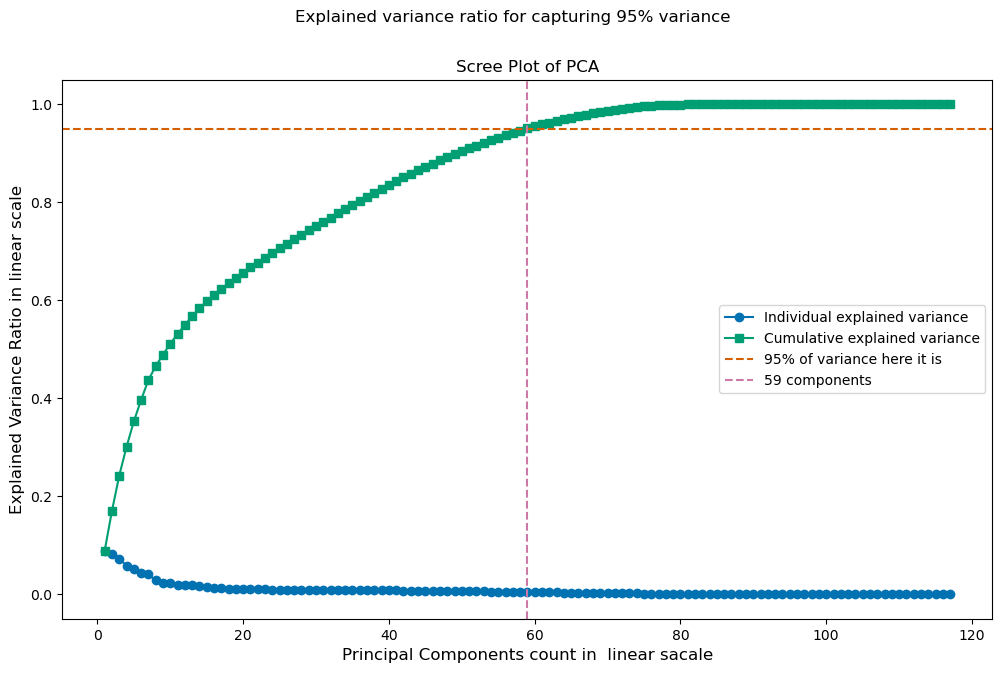

In [6]:
# getting he number of components
 
plt.figure(figsize=(12,7))

# this plot is for indiviual variance
plt.plot(range(1, len(explained_var_ratio)+1), explained_var_ratio, marker='o', color="#0072B2", label="Individual explained variance")
#this plot is for cummulative variance
plt.plot(range(1, len(cumulative_explained_var)+1), cumulative_explained_var, marker='s', color="#009E73", label="Cumulative explained variance")

# Horizatal line for 95 percen cumm variance
plt.axhline(y=0.95, color="#D55E00", linestyle='--', label="95% of variance here it is")

# Vertical line at the 95 percent variance
componentsfor95percent = np.argmax(cumulative_explained_var >= 0.95) + 1 # +1because we have indexing from 0
plt.axvline(x=componentsfor95percent, color="#CC79A7", linestyle='--', label=f"{componentsfor95percent} components")

# leabelling
plt.xlabel("Principal Components count in  linear sacale", fontsize=12)
plt.ylabel("Explained Variance Ratio in linear scale", fontsize=12)

# Title and suptitle for plot
plt.title("Scree Plot of PCA")
plt.suptitle("Explained variance ratio for capturing 95% variance")
plt.legend()

* The above scree plot showing the variance explained by each PC in blue and the cumulative variance in green. The horizontal dashed line marks the 95% variance threshold, and the vertical dashed line at x = 59 shows that the first 59 PCs capture at mim of 95% of the total variance in the dataset.

* Minimum components for capturing 95 percent cumsum variance is 59.

#### Visualization:

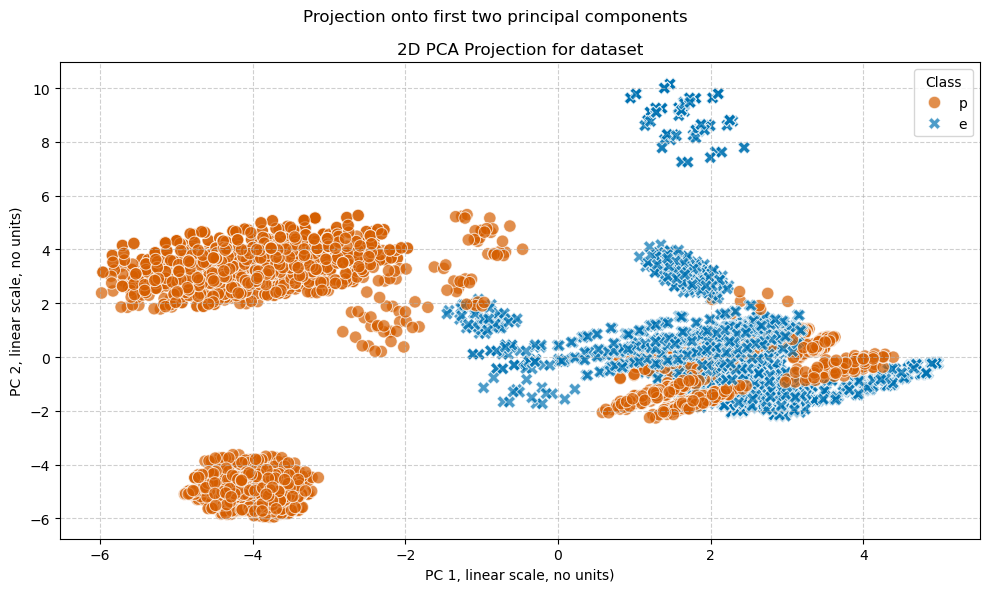

In [7]:


# using first two PCs
X_pca_2_components = X_pca[:, :2]

#df for those 2 components for scater plot
pca_df = pd.DataFrame(X_pca_2_components, columns=['PC1', 'PC2'])
pca_df['class'] = y

# figure
plt.figure(figsize=(10,6))
#scatterplot between pc1 and pc2
sns.scatterplot(data=pca_df,x='PC1',y='PC2',hue='class',style='class',palette={"e": "#0072B2", "p": "#D55E00"},alpha=0.7,s=80
)

# Title and suptitle
plt.title("2D PCA Projection for dataset")
plt.suptitle("Projection onto first two principal components")

# Axes labels with scale
plt.xlabel("PC 1, linear scale, no units)")
plt.ylabel("PC 2, linear scale, no units)")


plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Class', loc='best')

plt.tight_layout()
plt.show()


* The PC1 and PC2 components can rasily divide blue from the orange datapoints, whichc is easily find edible datapoints, but it cannot really properly identify the poisonous class as you can see it overlapping with edible class, although the variance ratio high for theses two data points, the class cannot be strictly distinguished, so there are other PCs that has the information that can know to distinguish these two classes.

#### we can try pairplot on more PCS to check for the clear classification boundary, let's see combination of few more PCs just to see if we can have boundary line for class datapoints.

<Figure size 600x700 with 0 Axes>

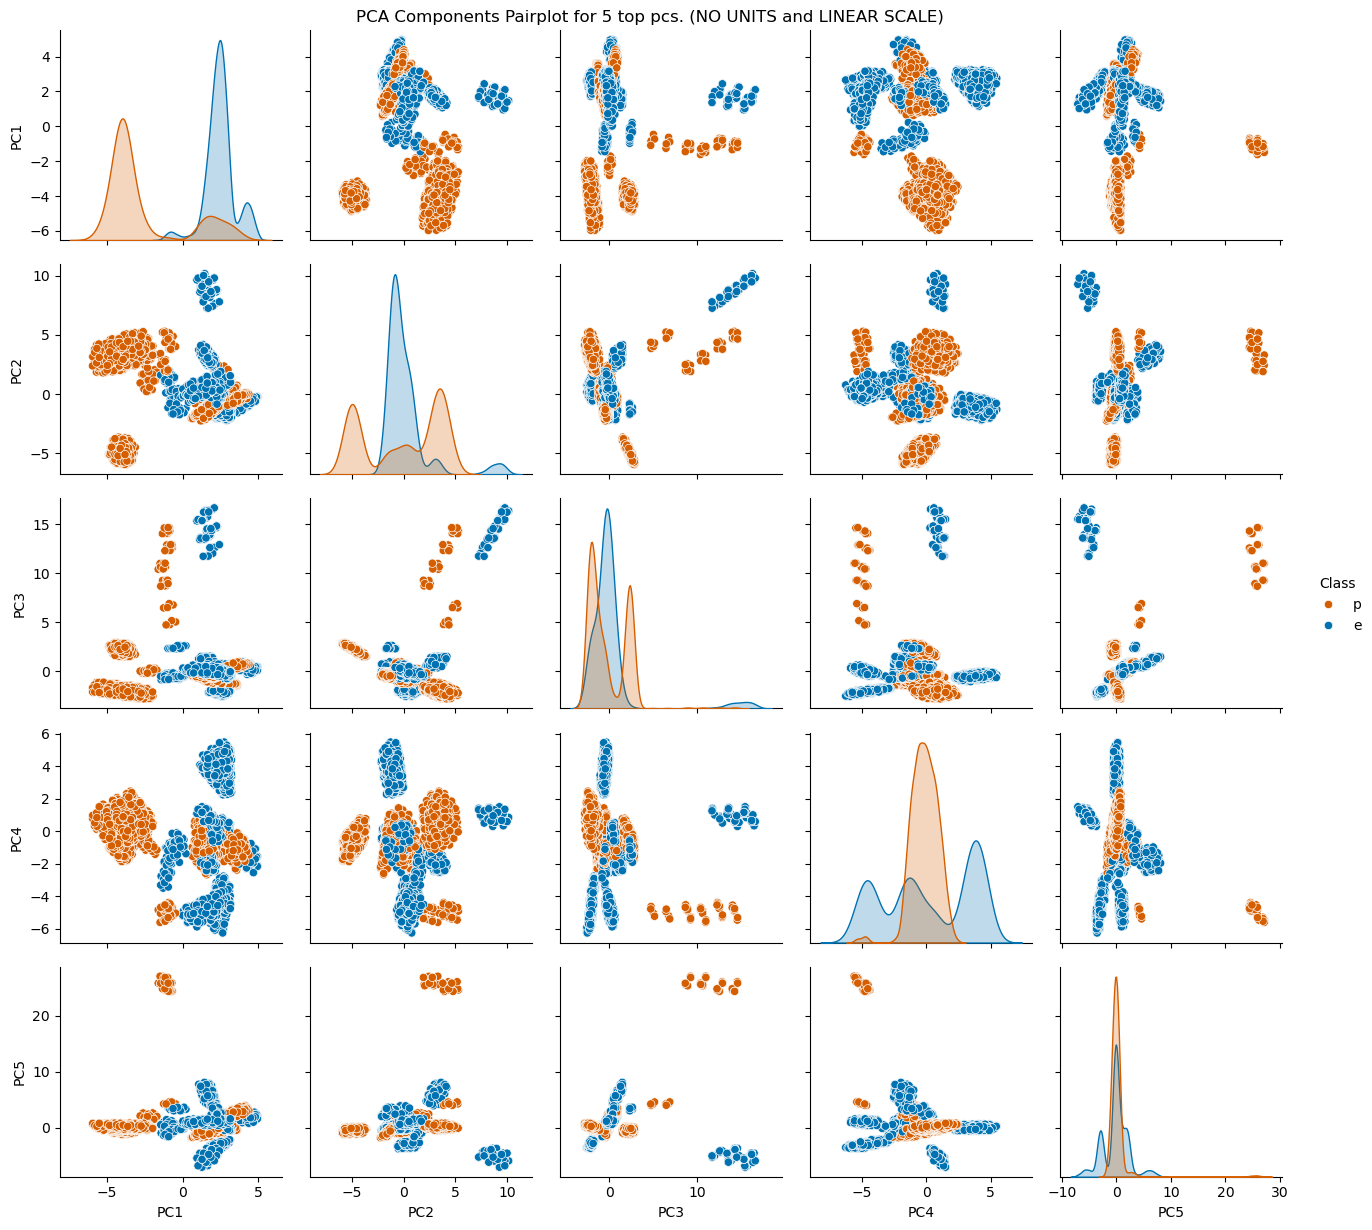

In [8]:
# using 1-5 components,
pca_df = pd.DataFrame(X_pca[:, 0:5], columns=["PC1","PC2","PC3","PC4","PC5"])
pca_df['class'] = y.values

# Create pairplot
plt.figure(figsize=(6, 7))
pair=sns.pairplot(data=pca_df, hue='class',palette={"e": "#0072B2", "p": "#D55E00"})
pair._legend.set_bbox_to_anchor((1.05, 0.5))
pair._legend.set_title("Class")
plt.suptitle('PCA Components Pairplot for 5 top pcs. (NO UNITS and LINEAR SCALE)')
plt.tight_layout()
plt.show()

* As we saw pc1 and pc2 can distinguish atleast blue which is edible ones from poisonous ones but not with 100 percent accuracy, but if we are looking at all other pairs, we can see that ther is no clear boundary for even identifying one class.  This might tell us that the differentiating info might be spread across all the pca values ( which indeed we do while calculating pca components that gives us the max variance and capture all components)

This tells us that few high variance columns doesn't always carry information to accurately classify, the distinguishable features of mushroom classes are distributed throughout the PCA space, not captured by the top components alone.

#### C) Performance Evaluation with Logistic Regression 

#### Performance without PCA with logistic regression

In [9]:
# Train-test split of the scaled x without pca 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify= y)

# Logistic Regression baseline
LR = LogisticRegression(max_iter=500)
LR.fit(X_train, y_train)

# Predictions
y_pred = LR.predict(X_test)

# Evaluation
print("Baseline Model (Original Data):")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report\n\n", classification_report(y_test, y_pred))


Baseline Model (Original Data):
Accuracy: 1.0

Classification Report

               precision    recall  f1-score   support

           e       1.00      1.00      1.00       842
           p       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



logistic regression uses a linear combination of all the variables,so it was able to predict perfectly, with accuracy, precision, recall, and F1‑score all at 100% using all the variables, and let's see, if we can achieve on par result from pca with optimum components at 95 percent variance.

#### Performance without PCA with logistic regression

 #### pca with just 5 components just to cross verify our statement made during pairplot visualization

 * As discussed during the pairplot, allthough the high variance is captured by first 5 components it is not enough to classify the datapoints, let's test with first 5 components and then with optimum value of 59.

In [10]:
# Apply PCA with just 5 components
k = 5 
pca_optimal = PCA(n_components=k)

X_train_pca = pca_optimal.fit_transform(X_train)
X_test_pca = pca_optimal.transform(X_test)

# Train Logistic Regression on PCA-transformed data
logreg_pca = LogisticRegression(max_iter=500)
logreg_pca.fit(X_train_pca, y_train)

# Predictions
y_pred_pca = logreg_pca.predict(X_test_pca)

# Evaluation
print("PCA-Transformed Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_pca))
print("\nClassification Report\n\n", classification_report(y_test, y_pred_pca))


PCA-Transformed Model:
Accuracy: 0.8732307692307693

Classification Report

               precision    recall  f1-score   support

           e       0.83      0.95      0.89       842
           p       0.94      0.79      0.86       783

    accuracy                           0.87      1625
   macro avg       0.88      0.87      0.87      1625
weighted avg       0.88      0.87      0.87      1625



* As we can see few high variance columns are not enough to classify the classes e and p, we can see the accuracy dropped tO 0.87 and so the recall anc precisision and f1 score for both the classes, and this is still a high accuracy in general terms, as we are using the top 5 components which capture the highest variance ratio from the dataset. Let's test it with 59 components which we found that it captures 95 percent of variance.

#### pca with optimal components

In [11]:
# Apply PCA with optimal number of components
k = 59 #from the pca
pca_optimal = PCA(n_components=k)

X_train_pca = pca_optimal.fit_transform(X_train)
X_test_pca = pca_optimal.transform(X_test)

# Train Logistic Regression on PCA-transformed data
logreg_pca = LogisticRegression(max_iter=500)
logreg_pca.fit(X_train_pca, y_train)

# Predictions
y_pred_pca = logreg_pca.predict(X_test_pca)

# Evaluation
print("PCA-Transformed Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_pca))
print("\nClassification Report\n\n", classification_report(y_test, y_pred_pca))


PCA-Transformed Model:
Accuracy: 0.9987692307692307

Classification Report

               precision    recall  f1-score   support

           e       1.00      1.00      1.00       842
           p       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



#### Final Analysis: 


* As we can see, the accuracy score with 59 components which convers 95 perceent of the cumulative variance in PCAs is enough to give same accuracy as all the 117 columns earlier, which is almost half of the original components. Recall, precision and f1_score is 100 same as the original logistic regression without PCA.

* There is no drop in performance of PCA, and as the coefficients of the logistic regressions are not unstable anymore like collinear dataset, as all the PCS are non collinear and logistic regresion coeffiencts will be stable.

* PCA is useful for dimensionality reduction (117  to 59 features) without performance loss,  increased efficiency which is speed(for bigger data sets it will be clearly visible), and we saw the report where the metrics have not changed at all, and accuracy is almost same.

--------------------------------------------------------PCA AND LOGISTIC REGRESSION--------------------------------------------------------------------

* Logistic regressions is very simple regression model, that fits with the data we give it, for example for the original data it took all the datapoints's linear combination to predict the class, in case we miss any important data or if PCA doesn't capture information from the original data, there will be huge dip in performance, like how we have seen with even top 5 PCs we were not able to cross 90 percent accuracy.

* So, if linear combination of PCs will miss crucial information, suppose we remove top 10 PCs, then the logistic regression will perform too bad, which is directly telling us that PCs didnot preserve the information as we removed top 10 PCs. This direct linear combination of the logistic regression tells us the power of PCA, and why this is considered as best test for PCA.